In [125]:
import numpy as np
import pandas as pd
import warnings 
import seaborn as sb
import matplotlib.pyplot as plt

In [126]:
warnings.filterwarnings('ignore')

In [127]:
data='sample_data/adult.csv'
df=pd.read_csv(data, header=None, sep=',')

In [128]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [129]:
col_names=['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
df.columns=col_names
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [130]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [131]:
df.drop(0,axis=0)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [133]:
categorical=[i for i in df.columns if df[i].dtype=='O']
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [134]:
def jan_count(list):
  count=0
  for i in list:
    if i!='':
      count+=1
  print(count)
jan_count(categorical)

9


In [135]:
remove_list=['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']
categorical=list(set(categorical)-set(remove_list))
categorical
jan_count(categorical)

9


In [136]:
df[categorical].head()

,race,income,native_country,sex,education,workclass,relationship,occupation,marital_status
0,Black,<=50K,United-States,Male,11th,Private,Own-child,Machine-op-inspct,Never-married
1,White,<=50K,United-States,Male,HS-grad,Private,Husband,Farming-fishing,Married-civ-spouse
2,White,>50K,United-States,Male,Assoc-acdm,Local-gov,Husband,Protective-serv,Married-civ-spouse
3,Black,>50K,United-States,Male,Some-college,Private,Husband,Machine-op-inspct,Married-civ-spouse
4,White,<=50K,United-States,Female,Some-college,?,Own-child,?,Never-married


In [137]:
df[categorical].isnull().sum()

race              0
income            0
native_country    0
sex               0
education         0
workclass         0
relationship      0
occupation        0
marital_status    0
dtype: int64

In [138]:
for i in categorical:
  print(df[i].value_counts())

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64
<=50K    37155
>50K     11687
Name: income, dtype: int64
United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                 

In [139]:
#frequency distribution of categorical variables
for i in categorical:
  print(df[i].value_counts()/np.float(len(df)))

White                 0.855043
Black                 0.095922
Asian-Pac-Islander    0.031100
Amer-Indian-Eskimo    0.009623
Other                 0.008313
Name: race, dtype: float64
<=50K    0.760718
>50K     0.239282
Name: income, dtype: float64
United-States                 0.897424
Mexico                        0.019471
?                             0.017546
Philippines                   0.006040
Germany                       0.004218
Puerto-Rico                   0.003767
Canada                        0.003726
El-Salvador                   0.003173
India                         0.003092
Cuba                          0.002825
England                       0.002600
China                         0.002498
South                         0.002355
Jamaica                       0.002170
Italy                         0.002150
Dominican-Republic            0.002109
Japan                         0.001884
Guatemala                     0.001802
Poland                        0.001781
Vietnam     

In [140]:
df.native_country.unique()

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [141]:
df.native_country.value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [142]:
df['native_country'].replace('?',np.NaN,inplace=True)

In [143]:
df.native_country.value_counts()

United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

In [144]:
df.workclass.unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [145]:
df['workclass'].replace('?',np.NaN,inplace=True)

In [146]:
df.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [147]:
df.occupation.unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [148]:
df['occupation'].replace('?',np.NaN,inplace=True)

In [149]:
df.occupation.value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [150]:
df[categorical].isnull().sum()

race                 0
income               0
native_country     857
sex                  0
education            0
workclass         2799
relationship         0
occupation        2809
marital_status       0
dtype: int64

In [151]:
#checking cardinality of categorical variables
for i in categorical:
  print(i,'contains',len(df[i].unique()),'lables')

race contains 5 lables
income contains 2 lables
native_country contains 42 lables
sex contains 2 lables
education contains 16 lables
workclass contains 9 lables
relationship contains 6 lables
occupation contains 15 lables
marital_status contains 7 lables


In [152]:
numerical=list(set(df.columns)-set(categorical))
numerical

['fnlwgt',
 'hours_per_week',
 'capital_loss',
 'education_num',
 'age',
 'capital_gain']

In [153]:
jan_count(numerical)

6


In [154]:
df[numerical].head()

,fnlwgt,hours_per_week,capital_loss,education_num,age,capital_gain
0,226802,40,0,7,25,0
1,89814,50,0,9,38,0
2,336951,40,0,12,28,0
3,160323,40,0,10,44,7688
4,103497,30,0,10,18,0


In [155]:
df[numerical].isnull().sum()

fnlwgt            0
hours_per_week    0
capital_loss      0
education_num     0
age               0
capital_gain      0
dtype: int64

In [156]:
x=df.drop(['income'],axis=1)
y=df['income']

In [157]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [158]:
x_train.shape,x_test.shape

((34189, 14), (14653, 14))

In [159]:
x_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
dtype: object

In [160]:
categorical=[i for i in x_train.columns if x_train[i].dtype=='O']
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [161]:
jan_count(categorical)

8


In [162]:
numerical=[i for i in x_train.columns if x_train[i].dtype!='O']
numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [163]:
jan_count(numerical)

6


In [164]:
x_train[categorical].isnull().mean()

workclass         0.057211
education         0.000000
marital_status    0.000000
occupation        0.057358
relationship      0.000000
race              0.000000
sex               0.000000
native_country    0.017608
dtype: float64

In [165]:
for i in categorical:
  if x_train[i].isnull().mean()>0:
    print(i,':',x_train[i].isnull().mean())

workclass : 0.05721138377840826
occupation : 0.05735762964696247
native_country : 0.017608002573927285


In [166]:
for df2 in [x_train,x_test]:
  df2['workclass'].fillna(x_train['workclass'].mode()[0],inplace=True)
  df2['occupation'].fillna(x_train['occupation'].mode()[0],inplace=True)
  df2['native_country'].fillna(x_train['native_country'].mode()[0],inplace=True)


In [167]:
x_train[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [168]:
x_test[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [169]:
x_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [170]:
x_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [171]:
pip install --upgrade category_encoders

In [172]:
import category_encoders as ce

In [173]:
x_train[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
3833,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Own-child,White,Female,United-States
34743,Private,10th,Married-civ-spouse,Craft-repair,Own-child,Other,Male,United-States
2022,Self-emp-not-inc,Assoc-voc,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States
1580,Private,Some-college,Never-married,Exec-managerial,Not-in-family,White,Female,United-States
4612,Private,HS-grad,Separated,Transport-moving,Unmarried,White,Female,United-States


In [174]:
encoder=ce.OneHotEncoder(cols=categorical)

In [175]:
x_train=encoder.fit_transform(x_train)

In [176]:
x_test=encoder.transform(x_test)

In [177]:
x_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
3833,27,1,0,0,0,0,0,0,0,131310,...,0,0,0,0,0,0,0,0,0,0
34743,42,0,1,0,0,0,0,0,0,367533,...,0,0,0,0,0,0,0,0,0,0
2022,32,0,0,1,0,0,0,0,0,38158,...,0,0,0,0,0,0,0,0,0,0
1580,36,0,1,0,0,0,0,0,0,148903,...,0,0,0,0,0,0,0,0,0,0
4612,29,0,1,0,0,0,0,0,0,359155,...,0,0,0,0,0,0,0,0,0,0


In [178]:
x_train.shape

(34189, 105)

In [179]:
cols=x_train.columns

In [180]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [181]:
x_train=pd.DataFrame(x_train,columns=[cols])

In [182]:
x_test=pd.DataFrame(x_test,columns=[cols])

In [183]:
x_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,-0.50,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.387237,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.575857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.25,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.161362,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.241033,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.506233,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [184]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [185]:
predict=gnb.predict(x_test)

In [186]:
predict

array(['<=50K', '>50K', '>50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype='<U5')

In [187]:
from  sklearn.metrics import accuracy_score
print('Model accuracy is:',accuracy_score(y_test,predict))

Model accuracy is: 0.8057053163174777


In [188]:
y_predict_train=gnb.predict(x_train)
y_predict_train

array(['<=50K', '<=50K', '>50K', ..., '>50K', '<=50K', '>50K'],
      dtype='<U5')

In [189]:
print('Training set accuracy is:',accuracy_score(y_train,y_predict_train))

Training set accuracy is: 0.8072186960718359


In [190]:
print('Training set score is:',gnb.score(x_train,y_train))
print('Testing set score is:',gnb.score(x_test,y_test))

Training set score is: 0.8072186960718359
Testing set score is: 0.8057053163174777


In [191]:
y_test.value_counts()

<=50K    11138
>50K      3515
Name: income, dtype: int64

In [192]:
null_accuracy=(11138)/(11138+3515)
print('The null-accuracy is:',null_accuracy)

The null-accuracy is: 0.7601173821060534


In [193]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predict)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[8992 2146]
 [ 701 2814]]

True Positives(TP) =  8992

True Negatives(TN) =  2814

False Positives(FP) =  2146

False Negatives(FN) =  701


In [194]:
print('Correct Predictions:',cm[0,0]+cm[1,1])
print('False Predictions:',cm[0,1]+cm[1,0])

Correct Predictions: 11806
False Predictions: 2847


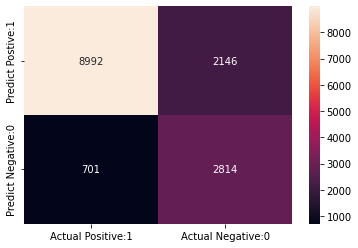

In [195]:
cm_matrix=pd.DataFrame(data=cm,columns=['Actual Positive:1','Actual Negative:0'],index=['Predict Postive:1','Predict Negative:0'])
sb.heatmap(cm_matrix, annot=True, fmt='d')

In [196]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

       <=50K       0.93      0.81      0.86     11138
        >50K       0.57      0.80      0.66      3515

    accuracy                           0.81     14653
   macro avg       0.75      0.80      0.76     14653
weighted avg       0.84      0.81      0.82     14653



In [197]:
classification_accuracy=(cm[0,0]+cm[1,1])/(cm[0,0]+cm[1,1]+cm[0,1]+cm[1,0])
print('Classification Accuracy is:',classification_accuracy)

Classification Accuracy is: 0.8057053163174777


In [198]:
classification_error=(cm[0,1]+cm[1,0])/(cm[0,0]+cm[1,1]+cm[0,1]+cm[1,0])
print('Classification Error is:',classification_error)

Classification Error is: 0.19429468368252234
